In [1]:
# ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import svm, metrics, preprocessing, cross_validation #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
from matplotlib.colors import ListedColormap #plot用
 
from sklearn import grid_search #最適パラメータ探索用のライブラリ
from sklearn import metrics #識別結果の表示用

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor=np.random.randn(200,2) 
y_xor=np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor=np.where(y_xor,1,0)
pd.DataFrame(y_xor)  #この行を実行するとデータが見れる

,0
0,0
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,1


<function matplotlib.pyplot.show>

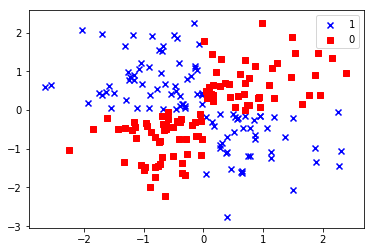

In [3]:
# プロットしてみる------------------------------------------------------
%matplotlib inline
 
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show

In [4]:
# データの整形-------------------------------------------------------
X_std=X_xor
z=y_xor
 
#データを学習データとテストデータに分ける
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)

ここでは、SVCのカーネルはrbfかlinearとし、Cとγは0.01, 0.1, 1.0をそれぞれ検証する

In [5]:
# グリッドサーチを設定する---------------------------------------------------
clf=svm.SVC(class_weight='balanced', random_state=0)
param_range=[0.01, 0.1, 1.0] #変化させるパラメータに設定する値たち
param_grid=[{'C':param_range,'kernel':['rbf', 'linear'], 'gamma':param_range}] #Cとカーネルとgammaを変化させて最適化させる

In [6]:
# グリッドサーチにより最適値を求める
gs=grid_search.GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs=gs.fit(X_train,train_label)
print(gs.best_score_)
print(gs.best_params_)

0.9555555555555556
{'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}


In [7]:
# 最適なパラメータをテストデータに適用し,結果を見る
clf=gs.best_estimator_
pred=clf.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pred)
print(ac_score) #テストデータの正答率
cnfmat=metrics.confusion_matrix(y_true=test_label,y_pred=pred )
print(cnfmat) #混合行列の表示
report=metrics.classification_report(y_true=test_label,y_pred=pred )
print(report) #適合率、再現率、F値の結果

0.9
[[ 8  2]
 [ 0 10]]
             precision    recall  f1-score   support

          0       1.00      0.80      0.89        10
          1       0.83      1.00      0.91        10

avg / total       0.92      0.90      0.90        20



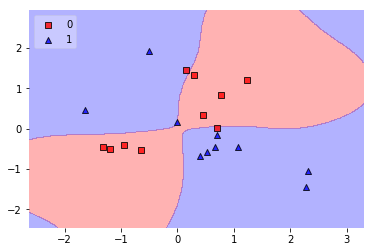

In [8]:
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
plot_decision_regions(X_test_plot, test_label_plot, clf=clf, res=0.01, legend=2) #テストデータをプロット